In [1]:
"""
Logistic Regression - Scikit-Learn Implementation
Using sklearn's optimized LogisticRegression with L-BFGS solver.
"""

import numpy as np
import json
import sys
sys.path.append('../..')

# Scikit-Learn
from sklearn.linear_model import LogisticRegression


# Self created utilities
from utils.metrics import accuracy, precision, recall, f1_score, auc_score
from utils.performance import track_performance
from utils.visualization import (
    plot_cost_curve,
    plot_confusion_matrix,
    plot_roc_curve,
    plot_feature_importance
)

# Load preprocessed data (already scaled, SMOTE applied, 50/50 balanced)
X_train = np.load('../../data/processed/logistic_regression/X_train.npy')
X_test = np.load('../../data/processed/logistic_regression/X_test.npy')
y_train = np.load('../../data/processed/logistic_regression/y_train.npy')
y_test = np.load('../../data/processed/logistic_regression/y_test.npy')

# Load metadata for feature names
with open('../../data/processed/logistic_regression/preprocessing_info.json') as f:
    meta = json.load(f)
feature_names = meta['feature_names']

print(f"Training: {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
print(f"Test: {X_test.shape[0]:,} samples")
print(f"Class balance - Train: {np.mean(y_train):.1%} fraud")
print(f"Class balance - Test: {np.mean(y_test):.1%} fraud")

Training: 454,902 samples, 30 features
Test: 56,962 samples
Class balance - Train: 50.0% fraud
Class balance - Test: 0.2% fraud


In [2]:
# Model training

# Scikit-Learn's LogisticRegression uses L-BFGS solver by default
# - L-BFGS: Quasi-Newton method, efficient for medium datasets
# - max_iter: Increased for convergence on large dataset
# - random_state: For reproducibility

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    random_state=113
)

# Train with performance tracking
with track_performance() as perf:
    model.fit(X_train, y_train)

print(f"\nTraining complete!")
print(f"Time: {perf['time']:.2f} sec | Memory: {perf['memory']:.2f} MB")
print(f"Iterations to converge: {model.n_iter_[0]}")


Training complete!
Time: 0.32 sec | Memory: 14.38 MB
Iterations to converge: 22


In [4]:
# Evaluation on Test Set

# Get predictions
y_pred = model.predict(X_test)          # Binary predictions (0 to 1)
y_proba = model.predict_proba(X_test)[:, 1]   # Probability of class 1 (fraud)

# Calculate metrics using the shared utilities
acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred)
rec = recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = auc_score(y_test, y_pred)

# Print results
print("=" * 40)
print("TEST SET RESULTS")
print("=" * 40)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

TEST SET RESULTS
Accuracy:  0.9876
Precision: 0.1042
Recall:    0.8163
F1 Score:  0.1848
AUC-ROC:   0.8972


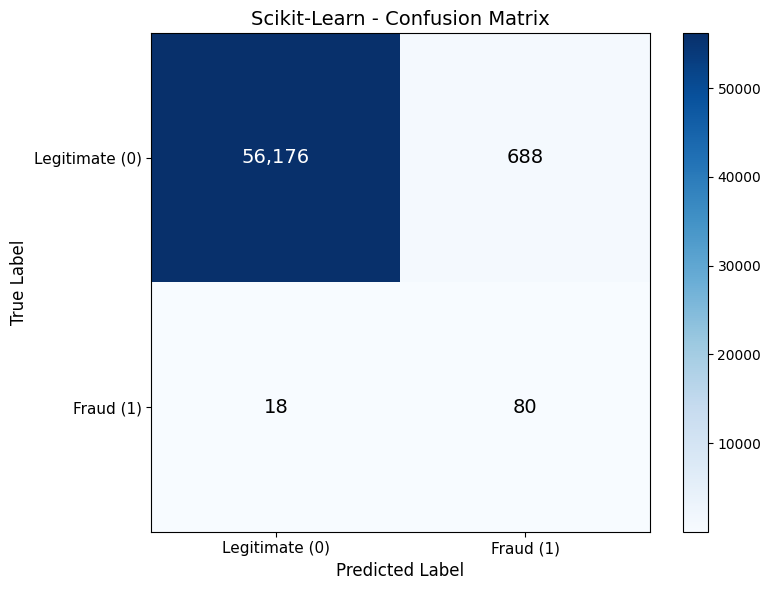

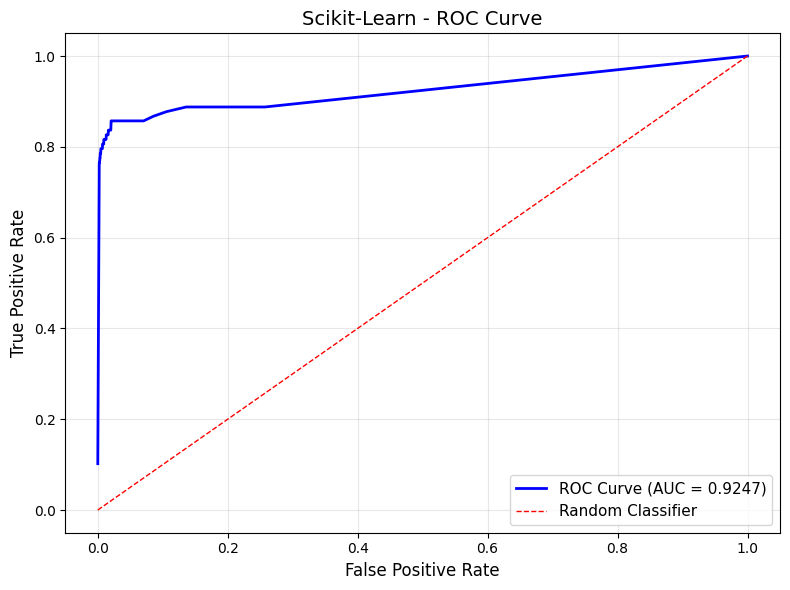

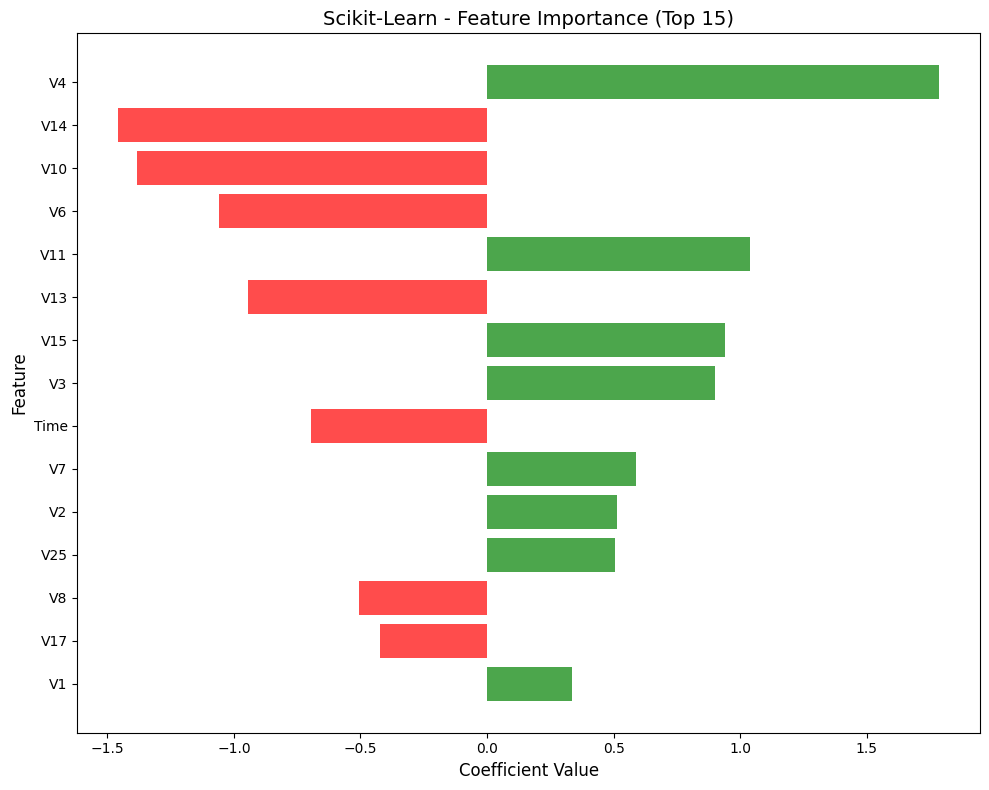

In [5]:
# Visualizations

# Confusion matrix - shows prediction breakdown
plot_confusion_matrix(
    y_test, y_pred,
    framework="Scikit-Learn",
    save_path="results/confusion_matrix.png"
)

# ROC curve - shows discrimination ability
plot_roc_curve(
    y_test, y_proba,
    framework="Scikit-Learn",
    save_path="results/roc_curve.png"
)

# Feature importance (sklearn stores coefficients in model.coef_)
weights = model.coef_[0]    # Shape is (1, n_features), so we take [0]
plot_feature_importance(
    weights, feature_names,
    framework="Scikit-Learn",
    save_path="results/feature_importance.png"
)
